In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os

plt.style.use("../config/custom_plots.mplstyle")

In [10]:
def load_last_opinion(ps, nruns, q):
    mean_opinions = []
    std_opinions = []
    for p in tqdm(ps):
        opinion_per_p = []
        for n in range(nruns):
            file = f"../simulations/test_q_voter/test_p_NAGENTS=1000_NSTEPS=1000000_FRAC_LINKS=0.01_FRAC_POS_OPINION=1.0_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p={p}_q={q}_EPIDEMIC=beta=0.5_gamma=0.3_mu=0.9_kappa=0.1_maxInfectedTime=10.0_NRUN={n}.tsv"
            with open(file, 'rb') as f:
                f.seek(-2, os.SEEK_END)
                while f.read(1) != b'\n':
                    f.seek(-2, os.SEEK_CUR)
                last_line = f.readline().decode()
                steps, mean_opinion, _, _, _, _, _ = last_line.strip().split("\t")
                opinion_per_p.append(float(mean_opinion))
        mean_opinions.append(np.mean(opinion_per_p))
        std_opinions.append(np.std(opinion_per_p))
    return mean_opinions, std_opinions

ps = np.linspace(0.0, 0.5, 50)
# ps = [f'{x:.2f}'.replace('.', ',') for x in ps]
ps = [f'{x:.2f}' for x in ps]
n = 50
ps = ps[:n]

m3, s3 = load_last_opinion(ps, 50, 3)
m4, s4 = load_last_opinion(ps, 50, 4)
m5, s5 = load_last_opinion(ps, 50, 5)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 1.0, 'DO NOT add the same neighbour is less than q')

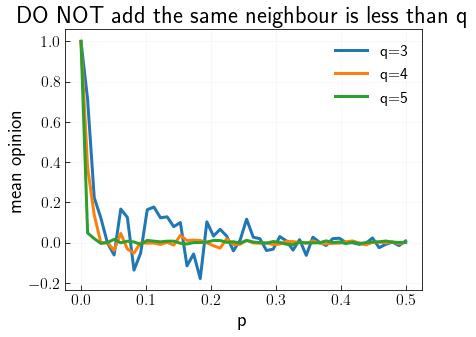

In [11]:
x = ps = np.linspace(0.0, 0.5, 50)[:n]

# plt.errorbar(x, m3, yerr=s3, label='q=3')
plt.plot(x, m3, label='q=3')
plt.plot(x, m4, label='q=4')
plt.plot(x, m5, label='q=5')

plt.ylabel("mean opinion")
plt.xlabel("p")
# plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("DO NOT add the same neighbour is less than q")